In [1]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle
import gwPaPa_func as gwpapa

import os, errno
#from injections import 

In [2]:
#BBH_path='data_BBH'
BNS_path='data_BNS'
#BBH_check_path='data_BBH_check'
BNS_check_path='data_BNS_check'

In [3]:
injections_BNS = pickle.load(open(BNS_path+'/injections-BNS.p', "rb"))
#injections_BBH = pickle.load(open(BBH_path+'/injections-BBH.p', "rb"))
injections_BNS_check = pickle.load(open(BNS_check_path+'/injections-BNS.p', "rb"))
#injections_check_BBH = pickle.load(open(BBH_check_path+'/injections-BBH.p', "rb"))

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [4]:
print(injections_BNS[0])
dt=injections_BNS[0][0]['deltaT']
print(dt)

[{'sim-id': 'BNS-1', 'mass_1': 1.5242401922792246, 'mass_2': 1.4415945204073988, 'S1x': 0.0, 'S1y': 0.0, 'S1z': 0.0, 'S2x': 0.0, 'S2y': 0.0, 'S2z': 0.0, 'distance': 1000.0, 'inclination': 0.0, 'right_ascension': 0.3, 'declination': -0.4, 'psi': 0.0, 'phiRef': 0.0, 'lambda1': 0.0, 'lambda2': 0.0, 'f_min': 20.0, 'f_ref': 20.0, 'deltaT': 0.000244140625, 'start_time': 802, 'duration': 202}, <pycbc.types.timeseries.TimeSeries object at 0x1119a2780>]
0.000244140625


In [5]:
num_BNS_injections=len(injections_BNS)
#num_BBH_injections=len(injections_BBH)
num_BNS_injections_check=len(injections_BNS_check)
#num_BBH_injections_check=len(injections_BBH_check)

print(num_BNS_injections)
#print(num_BBH_injections)
print(len(injections_BNS_check))
#print(len(injections_BBH_check))


BNS_data=[]
#BBH_data=[]
BNS_data_check=[]
#BBH_check_data=[]
#train_labels=[]
#check_labels=[]
t0=50
tl=50

for i in range(len(injections_BNS)):
    d = np.array(injections_BNS[i][1])
    t = np.arange(0,len(d)*dt,dt)
    BNS_data.append(gwpapa.twindow(t,d,t0,tl))
    
for i in range(len(injections_BNS_check)):
    d = np.array(injections_BNS_check[i][1])
    t = np.arange(0,len(d)*dt,dt)
    BNS_data_check.append(gwpapa.twindow(t,d,t0,tl))
 
t0=7
tl=50

#for i in range(len(injections_BBH)):
    #d = np.array(injections_BBH[i][1])
    #t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    #BBH_data.append(gwpapa.twindow(t,d,t0,tl))
    
#for i in range(len(injections_BBH_check)):
    #d = np.array(injections_BBH_check[i][1])
    #t = np.arange(0,len(d)/sample_rate,1/sample_rate)
    #BBH_check_data.append(gwpapa.twindow(t,d,t0,tl))

BNS_data=np.array(BNS_data)
BNS_data_check=np.array(BNS_data_check)    
    
print('done')

180
20
done


In [6]:
mass_1=np.array([])
mass_2=np.array([])
mass_1_check=np.array([])
mass_2_check=np.array([])
#identity=np.array([],dtype=bool)
#identity_check=np.array([],dtype=bool)
num_injections=len(injections_BNS)#+len(injections_BBH)
num_injections_check=len(injections_BNS_check)#+len(injections_check_BBH)

for i in range(len(injections_BNS)):
    mass_1=np.append(mass_1,injections_BNS[i][0]["mass_1"])
    mass_2=np.append(mass_2,injections_BNS[i][0]["mass_2"])

#for i in range(len(injections_BBH)):
    #mass_1=np.append(mass_1,injections_BBH[i][0]["mass_1"])
    #mass_2=np.append(mass_2,injections_BBH[i][0]["mass_2"])
    
for i in range(len(injections_BNS_check)):
    mass_1_check=np.append(mass_1_check,injections_BNS_check[i][0]["mass_1"])
    mass_2_check=np.append(mass_2_check,injections_BNS_check[i][0]["mass_2"])

#for i in range(len(injections_check_BBH)):
    #mass_1_check=np.append(mass_1_check,injections_check_BBH[i][0]["mass_1"])
    #mass_2_check=np.append(mass_2_check,injections_check_BBH[i][0]["mass_2"])

In [7]:
M_chirp=(mass_1*mass_2)**(3/5)/(mass_1+mass_2)**(1/5)
eta=(mass_1*mass_2)/(mass_1+mass_2)**2.0

M_chirp_check=(mass_1_check*mass_2_check)**(3/5)/(mass_1_check+mass_2_check)**(1/5)
eta_check=(mass_1_check*mass_2_check)/(mass_1_check+mass_2_check)**2.0

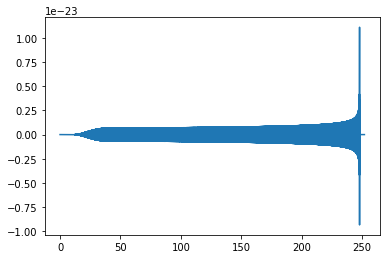

In [8]:
sample_rate=4096
#t=np.arange(0,500,1/sample_rate)

try:
    d0 =injections_BNS[2][1]
    t0 = np.arange(0,len(d0)/sample_rate,1/sample_rate)
    plt.plot(t0,d0)
    plt.show()
except:
    pass

In [9]:
noise_amplitude=2*10**(-23)

path='w-noise-bandpass-amp-'+str(noise_amplitude)

try:
    os.makedirs('pics/'+str(path))
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

(180, 204799)


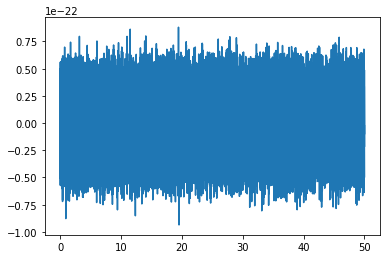

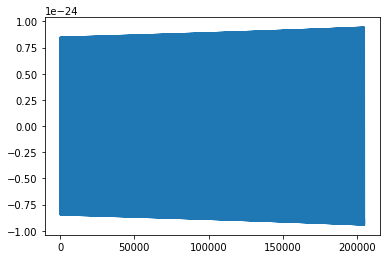

In [40]:
#print(BNS_data.shape)
#print((BBH_data*0).shape)
    
train_data=np.array(BNS_data)#np.concatenate((BNS_data),axis=0)
check_data=np.array(BNS_data_check)#np.concatenate((BNS_data_check),axis=0)

train_data_clean=train_data+0
check_data_clean=check_data+0

print(train_data.shape)
    
noise_BNS = noise_amplitude*np.random.normal(size=BNS_data[int(num_BNS_injections/2000):int(num_BNS_injections)].shape)
#noise_BBH = noise_amplitude*np.random.normal(size=BBH_data[int(num_BBH_injections/2000):int(num_BBH_injections)].shape)
noise_BNS_check = noise_amplitude*np.random.normal(size=BNS_data[int(num_BNS_injections_check/200):int(num_BNS_injections_check)].shape)
#noise_BBH_check = noise_amplitude*np.random.normal(size=BBH_data[int(num_BBH_injections_check/200):int(num_BBH_injections_check)].shape)

t = np.arange(0,len(noise_BNS[0])*dt,dt)
plt.plot(t,noise_BNS[0])
plt.show()

train_data[int(num_BNS_injections/2000):int(num_BNS_injections)] = noise_BNS + train_data[int(num_BNS_injections/2000):int(num_BNS_injections)]
#train_data[int(num_BBH_injections/2000+num_BNS_injections):int(num_BBH_injections+num_BNS_injections)] += noise_BBH
check_data[int(num_BNS_injections_check/200):int(num_BNS_injections_check)] = noise_BNS_check + check_data[int(num_BNS_injections_check/200):int(num_BNS_injections_check)]
#check_data[int(num_BBH_injections_check/200+num_BNS_injections_check):int(num_BBH_injections_check+num_BNS_injections_check)] += noise_BBH_check
    
    
    
#train_data = train_data / np.linalg.norm(train_data)
#check_data = check_data / np.linalg.norm(check_data)


#plt.plot(BNS_data[0])

plt.plot(train_data_clean[0])
plt.show()
  

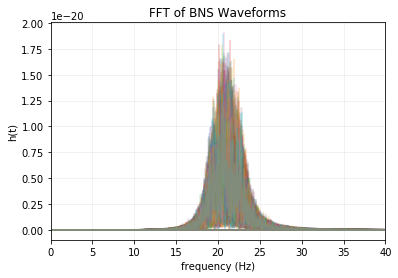

In [41]:
fftfreq=np.fft.fftfreq(len(BNS_data[0]),dt)
freqmax=np.array([])
freqmax_clean=np.array([])
freqmax_check=np.array([])

                       
for i in range(int(len(train_data))):
    d=gwpapa.butter_bandpass_filter(train_data[i],19,23,sample_rate,order=3)
    window=np.blackman(len(d))
    fft=np.fft.fft(d*window)
    freqmax=np.append(freqmax,np.abs(fftfreq[np.argmax(np.abs(fft))]))
    plt.plot(fftfreq,np.abs(fft),alpha=.2)

for i in range(int(len(train_data_clean))):
    d=gwpapa.butter_bandpass_filter(train_data_clean[i],19,23,sample_rate,order=3)
    window=np.blackman(len(d))
    fft=np.fft.fft(d*window)
    freqmax_clean=np.append(freqmax_clean,np.abs(fftfreq[np.argmax(np.abs(fft))]))
    #plt.plot(fftfreq,np.abs(fft),alpha=.2)  
    
#for i in range(len(injections_BNS_check)):
    #window=np.blackman(len(BNS_data_check[i]))
    #fft=np.fft.fft(BNS_data_check[i]*window)
    #freqmax_check=np.append(freqmax_check,np.abs(fftfreq[np.argmax(np.abs(fft))]))
    #plt.plot(fftfreq,np.abs(fft),alpha=.2)
    #plt.plot(fftfreq,np.abs(fft),'.',alpha=.2)
    
#plt.plot(fftfreq,np.abs(fft))
#plt.plot(fftfreq,np.abs(fft),alpha=.2)
#plt.plot(fftfreq,np.abs(fft),'.',alpha=.2)


plt.xlabel('frequency (Hz)')
plt.ylabel('h(t)')
plt.xlim(0,40)
plt.grid(alpha=.2)
plt.title('FFT of BNS Waveforms')
plt.savefig('pics/'+path+'/'+path+'.png',dpi=300)
plt.show()

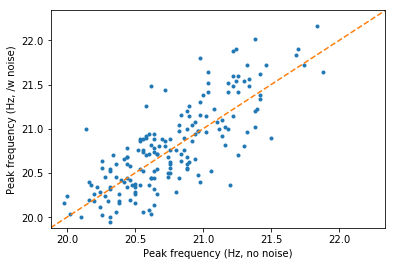

In [61]:
plt.plot(freqmax_clean,freqmax,'.')
plt.plot([np.min(freqmax_clean)-.1,np.max(freqmax_clean)+.1],[np.min(freqmax_clean)-.1,np.max(freqmax_clean)+.1],'--')
#plt.plot([19.5,22.5],[19.5,22.5])
plt.xlim(np.min(freqmax_clean)-.1,np.max(freqmax_clean)+.1)
plt.ylim(np.min(freqmax_clean)-.1,np.max(freqmax_clean)+.1)
plt.xlabel('Peak frequency (Hz, no noise)')
plt.ylabel('Peak frequency (Hz, /w noise)')
plt.show()

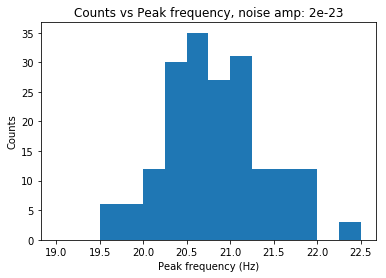

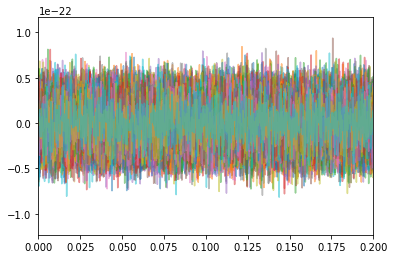

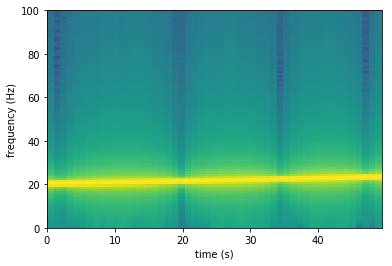

In [32]:
#print(freqmax)
plt.hist(freqmax,bins=[19,19.25,19.5,20,20.25,20.5,20.75,21,21.25,21.5,21.75,22,22.25,22.5])
plt.ylabel('Counts')
plt.xlabel('Peak frequency (Hz)')
plt.title(r'Counts vs Peak frequency, noise amp: '+str(noise_amplitude))
plt.savefig('pics/'+path+'/hist-'+path+'.png',dpi=300)
plt.show()

t=np.arange(0,len(BNS_data[0])*dt,dt)

for i in range(len(train_data)):
    plt.plot(t,train_data[i],alpha=.5)
plt.xlim(0,.2)
plt.savefig('pics/'+path+'/ht-'+path+'.png',dpi=300)
plt.show()

#print(freqmax)

plt.specgram(BNS_data[0],NFFT=4095,Fs=4096)
plt.ylim(0,100)
plt.xlabel('time (s)')
plt.ylabel('frequency (Hz)')
plt.savefig('pics/'+path+'/exspec-'+path+'.png',dpi=300)
plt.show()

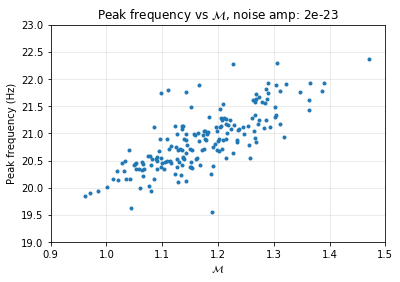

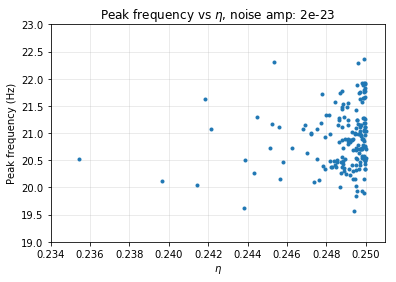

In [33]:
plt.plot(M_chirp,freqmax,'.')
plt.ylabel('Peak frequency (Hz)')
plt.xlabel(r'$\mathcal{M}$')
plt.grid(alpha=.3)
plt.xlim(.9,1.5)
plt.ylim(19,23)
plt.title(r'Peak frequency vs $\mathcal{M}$, noise amp: '+str(noise_amplitude))
plt.savefig('pics/'+path+'/Mchirp-'+path+'.png',dpi=300)
plt.show()

plt.plot(eta,freqmax,'.')
plt.ylabel('Peak frequency (Hz)')
plt.xlabel(r'$\eta$')
plt.grid(alpha=.3)
plt.xlim(.234,.251)
plt.ylim(19,23)
plt.title(r'Peak frequency vs $\eta$, noise amp: '+str(noise_amplitude))
plt.savefig('pics/'+path+'/eta-'+path+'.png',dpi=300)
plt.show()

#plt.plot(M_chirp_check,freqmax_check,'.')
#plt.show()
#plt.plot(eta_check,freqmax_check,'.')
#plt.show()

In [14]:
# For now we have 2features, so let's use 2N+1 neighbors
num_neighbors = 5
KNC = KNeighborsClassifier(num_neighbors)

In [15]:
X_train = np.column_stack([freqmax])
Y_train = identity

#print(X_train)
#print(Y_train)

X_train=np.reshape(X_train,(num_injections,2))

X_train.shape, Y_train.shape

NameError: name 'identity' is not defined

In [ ]:
KNC.fit(X_train, Y_train)

In [ ]:
X_check=np.array([freqmax_check])
print(len(X_check[0]))
Y_check= identity_check
X_check=np.reshape(X_check,(num_injections_check,2))
    
real_sol=KNC.predict(X_check)
#print(Y_check,real_sol)

Comparison=[Y_check==real_sol]
ind=[~Y_check==real_sol]
num_right=np.sum(Comparison)
    
print(Comparison)
#ind=np.where(X_check[Comparison])
print(X_check[ind])
frac_right=num_right/num_injections_check
    
#tot_num_right=tot_num_right+num_right
print(frac_right)


#print(tot_num_right/(checks*check_points))

In [ ]:
data={'M_chirp' : M_chirp,'eta' : eta, 'identity' : identity}
datapanda=pd.DataFrame(data=data)

data_check={'M_chirp' : M_chirp_check,'eta' : eta_check, 'identity' : identity_check}
datapanda_check=pd.DataFrame(data=data_check)

In [ ]:
pairplots = sns.pairplot(datapanda,vars=['M_chirp','eta'],hue='identity',diag_kind='auto')

In [ ]:
pairplots_check = sns.pairplot(datapanda_check,vars=['M_chirp','eta'],hue='identity',diag_kind='auto')